In [1]:
import pandas as pd
import numpy as np

In [2]:
ori_df = pd.read_csv('data/2016.csv', encoding="euc-kr")

In [4]:
ori_df.head(10)

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0
5,중부,강간,검거,96.0
6,중부,절도,발생,1204.0
7,중부,절도,검거,485.0
8,중부,폭력,발생,1335.0
9,중부,폭력,검거,1164.0


In [6]:
tmp_df = pd.pivot_table( ori_df, columns=["죄종"], index=['구분'], values=['건수'] )
tmp_df.head()

건수                           
죄종     강간    강도   살인      절도      폭력
구분                                  
강남  304.0  25.0  3.0  1783.5  2216.0
강동  156.0  13.5  4.5  1328.0  2365.5
강북  188.0   4.5  6.5   947.0  2630.0
강서  257.0  10.0  9.5  1511.0  2986.0
관악  293.0  11.0  6.5  1520.0  2971.0

In [15]:
tmp_df.columns

MultiIndex([('건수', '강간'),
            ('건수', '강도'),
            ('건수', '살인'),
            ('건수', '절도'),
            ('건수', '폭력')],
           names=[None, '죄종'])

In [16]:
df1 = ori_df[ ori_df['발생검거']=="발생"]
tmp_df1 = pd.pivot_table( df1,
                        columns=['죄종'],
                        index=['구분'],
                        values=['건수'])
newCol = {
    "강간":'강간 발생',
    "강도":'강도 발생',
    "살인":'살인 발생',
    "절도":'절도 발생',
    "폭력":'폭력 발생',
}

tmp_df1.rename( columns=newCol, inplace=True )
tmp_df1.head(2)

건수                            
죄종  강간 발생 강도 발생 살인 발생   절도 발생   폭력 발생
구분                                   
강남  339.0  24.0   3.0  2438.0  2336.0
강동  160.0  14.0   4.0  1754.0  2530.0

In [17]:
df2 = ori_df[ ori_df['발생검거']=="검거"]
tmp_df2 = pd.pivot_table( df2,
                        columns=['죄종'],
                        index=['구분'],
                        values=['건수'])
newCol = {
    "강간":'강간 검거',
    "강도":'강도 검거',
    "살인":'살인 검거',
    "절도":'절도 검거',
    "폭력":'폭력 검거',
}

tmp_df2.rename( columns=newCol, inplace=True )
tmp_df2.head(2)

건수                            
죄종  강간 검거 강도 검거 살인 검거   절도 검거   폭력 검거
구분                                   
강남  269.0  26.0   3.0  1129.0  2096.0
강동  152.0  13.0   5.0   902.0  2201.0

In [18]:
tmp = pd.concat( [ tmp_df1, tmp_df2 ], axis=1 )
tmp.head(2)

건수                                                               
죄종  강간 발생 강도 발생 살인 발생   절도 발생   폭력 발생  강간 검거 강도 검거 살인 검거   절도 검거   폭력 검거
구분                                                                      
강남  339.0  24.0   3.0  2438.0  2336.0  269.0  26.0   3.0  1129.0  2096.0
강동  160.0  14.0   4.0  1754.0  2530.0  152.0  13.0   5.0   902.0  2201.0

In [20]:
tmp = tmp.astype( np.int32 )
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 10 columns):
(건수, 강간 발생)    31 non-null int32
(건수, 강도 발생)    31 non-null int32
(건수, 살인 발생)    31 non-null int32
(건수, 절도 발생)    31 non-null int32
(건수, 폭력 발생)    31 non-null int32
(건수, 강간 검거)    31 non-null int32
(건수, 강도 검거)    31 non-null int32
(건수, 살인 검거)    31 non-null int32
(건수, 절도 검거)    31 non-null int32
(건수, 폭력 검거)    31 non-null int32
dtypes: int32(10)
memory usage: 1.5+ KB


In [21]:
tmp.to_csv('./data/2016_start.csv', sep=',', encoding="euc-kr")

In [26]:
# header => pivot_table의 멀티 인덱스를 업애주어야 함!

# pd.read_csv('data/2016_start.csv', encoding='euc-kr', header=0)
crime_per_police = pd.read_csv('data/2016_start.csv', encoding='euc-kr', header=1)
crime_per_police.head()

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
0,구분,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
2,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0
3,강북,217.0,5.0,7.0,1222.0,2778.0,159.0,4.0,6.0,672.0,2482.0
4,강서,275.0,10.0,9.0,1952.0,3204.0,239.0,10.0,10.0,1070.0,2768.0


In [27]:
crime_per_police.drop( [0], inplace=True )
crime_per_police.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
1,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
2,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [29]:
# 죄종이라는 칼럼으로 인덱스를 쓰겠다.
crime_per_police.set_index( '죄종', inplace=True )
crime_per_police.head()

KeyError: "None of ['죄종'] are in the columns"

In [30]:
crime_per_police

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0
강북,217.0,5.0,7.0,1222.0,2778.0,159.0,4.0,6.0,672.0,2482.0
강서,275.0,10.0,9.0,1952.0,3204.0,239.0,10.0,10.0,1070.0,2768.0
관악,322.0,12.0,6.0,2103.0,3235.0,264.0,10.0,7.0,937.0,2707.0
광진,279.0,11.0,4.0,2636.0,2392.0,234.0,6.0,4.0,1057.0,2011.0
구로,273.0,10.0,9.0,1910.0,3164.0,181.0,13.0,9.0,861.0,2680.0
금천,175.0,7.0,6.0,1264.0,2193.0,143.0,7.0,6.0,654.0,1946.0
남대문,57.0,5.0,1.0,946.0,890.0,52.0,4.0,1.0,429.0,832.0


In [33]:
crime_per_police = crime_per_police.astype( np.int32)
crime_per_police.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339,24,3,2438,2336,269,26,3,1129,2096
강동,160,14,4,1754,2530,152,13,5,902,2201


- 구분에 맞춰서 kakao api를 통해 해당 지역 경찰서 검색
- 해당 지역의 위도 경도 받아온다.
- 위도 경도로 지도에 원 그린다!

In [34]:
import requests
import json

KAKAO_API_KEY = "424cdf3a438dc70e245232542f7626c8"

In [35]:
def netGetGeocoder( query ):
    url = '''
        https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
    '''.format(query)
    headers = {
        'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
    } 
    res = requests.get( url, headers=headers )
    res = res.json()
    
    d1 = res['documents'][0]['address_name']
    d2 = res['documents'][0]['y']
    d3 = res['documents'][0]['x']
    d4 = res['documents'][0]['place_name']
    
    return d1, d2, d3, d4

In [42]:
print(netGetGeocoder('수영구'))

('부산 수영구 남천동 148-15', '35.1455382252165', '129.113133962151', '수영구청')


In [44]:
# pip install tqdm

# only jupyter => terminal에서 => nodejs가 있어야 함....
# jupyter labextension install @jupyter-widgets/jupyterlab-manager

# for문 반복을 막대 형태로 보여주는 것

SyntaxError: invalid syntax (<ipython-input-44-011f1939e977>, line 4)

In [47]:
import time
import requests
from tqdm import tqdm_notebook

In [48]:
police_station_info = []

for name in tqdm_notebook(crime_per_police.index):
    query = "서울%s경찰서" % name
    print("서울%s경찰서" % name)
    police_station_info.append(netGetGeocoder( query ))
    time.sleep(0.5)
police_station_info

서울강남경찰서
서울강동경찰서
서울강북경찰서
서울강서경찰서
서울관악경찰서
서울광진경찰서
서울구로경찰서
서울금천경찰서
서울남대문경찰서
서울노원경찰서
서울도봉경찰서
서울동대문경찰서
서울동작경찰서
서울마포경찰서
서울방배경찰서
서울서대문경찰서
서울서부경찰서
서울서초경찰서
서울성동경찰서
서울성북경찰서
서울송파경찰서
서울수서경찰서
서울양천경찰서
서울영등포경찰서
서울용산경찰서
서울은평경찰서
서울종로경찰서
서울종암경찰서
서울중랑경찰서
서울중부경찰서
서울혜화경찰서



[('서울 강남구 대치동 998', '37.5093899463715', '127.067070541137', '서울강남경찰서'),
 ('서울 강동구 성내동 541-1', '37.5286763457485', '127.126894359114', '서울강동경찰서'),
 ('서울 강북구 번동 415-15', '37.637408362838', '127.027340967017', '강북경찰서'),
 ('서울 강서구 화곡동 980-27',
  '37.5513470867979',
  '126.849886071842',
  '서울강서경찰서(2020년예정)'),
 ('서울 관악구 봉천동 1695-5', '37.4745875338795', '126.951062346192', '서울관악경찰서'),
 ('서울 광진구 구의동 254-32', '37.54292164557882', '127.08396170505674', '서울광진경찰서'),
 ('서울 구로구 구로동 436', '37.4948844667899', '126.886660285169', '서울구로경찰서'),
 ('서울 금천구 시흥동 산 189', '37.45725314643252', '126.89674921449215', '서울금천경찰서'),
 ('서울 중구 남대문로5가 567', '37.55478043476484', '126.97349729923079', '서울남대문경찰서'),
 ('서울 노원구 하계동 250', '37.6423345266253', '127.071404832413', '서울노원경찰서'),
 ('서울 도봉구 창동 17', '37.6533976253312', '127.052708256522', '서울도봉경찰서'),
 ('서울 동대문구 청량리동 229', '37.5850804205685', '127.045762797538', '서울동대문경찰서'),
 ('서울 동작구 노량진동 72-35', '37.5131469479959', '126.942857105642', '서울동작경찰서'),
 ('서울 마포구 아현동 618-1',

In [53]:
# 위도만 따로 저장
lats = []
for station in police_station_info:
    lats.append(station[1])
# lats

In [54]:
# 리스트 내포
addrs = [ station[0] for station in police_station_info ]
lats = [ station[1] for station in police_station_info ]
lngs = [ station[2] for station in police_station_info ]
names = [ station[3] for station in police_station_info ]


In [59]:
# 자치구 데이터 추가

# 일반적인 방법
tmp_gu = []
for addr in addrs:
    if addr:
        tmp_gu.append( addr.split()[1] )

# 리스트 내포
tmp_gu = [ addr.split()[1] for addr in addrs if addr ]


In [60]:
crime_per_police['자치구'] = tmp_gu

In [61]:
crime_per_police.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
죄종,,,,,,,,,,,
강남,339,24,3,2438,2336,269,26,3,1129,2096,강남구
강동,160,14,4,1754,2530,152,13,5,902,2201,강동구
강북,217,5,7,1222,2778,159,4,6,672,2482,강북구
강서,275,10,9,1952,3204,239,10,10,1070,2768,강서구
관악,322,12,6,2103,3235,264,10,7,937,2707,관악구


In [65]:
# unique 조사 및 인덱스와 비교
print(crime_per_police.index)
crime_per_police['자치구'].unique()

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='죄종')


array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '중구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '은평구', '성동구',
       '성북구', '송파구', '양천구', '영등포구', '용산구', '종로구', '중랑구'], dtype=object)

In [66]:
# 잘못된 데이터가 있는 경우 일일이 바꿔주어야 한다..
# 도메인 지식 필요하다..
crime_per_police.loc['강서', '자치구']="강서구"
crime_per_police.loc['금천', '자치구']="금천구"

In [67]:
crime_per_police.to_csv('./data/crime_analysis_mid_save.csv', sep=',', encoding='euc-kr')

In [68]:
crime_per_police_raw = pd.read_csv('./data/crime_analysis_mid_save.csv', encoding='euc-kr')

In [73]:
crime_per_police_raw

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
0,강남,339,24,3,2438,2336,269,26,3,1129,2096,강남구
1,강동,160,14,4,1754,2530,152,13,5,902,2201,강동구
2,강북,217,5,7,1222,2778,159,4,6,672,2482,강북구
3,강서,275,10,9,1952,3204,239,10,10,1070,2768,강서구
4,관악,322,12,6,2103,3235,264,10,7,937,2707,관악구
5,광진,279,11,4,2636,2392,234,6,4,1057,2011,광진구
6,구로,273,10,9,1910,3164,181,13,9,861,2680,구로구
7,금천,175,7,6,1264,2193,143,7,6,654,1946,금천구
8,남대문,57,5,1,946,890,52,4,1,429,832,중구
9,노원,159,6,5,1857,2516,142,9,6,740,2124,노원구


In [69]:
crime_anal = pd.pivot_table( crime_per_police_raw, index='자치구' , aggfunc=np.sum)

In [74]:
crime_anal.head(2)

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
자치구,,,,,,,,,,
강남구,413,516,42,39,5,5,1918,3587,3527,4002
강동구,152,160,13,14,5,4,902,1754,2201,2530


In [76]:
crime_anal['폭력검거율']= crime_anal['폭력 검거']/crime_anal['폭력 발생'] * 100
crime_anal['절도검거율']= crime_anal['절도 검거']/crime_anal['절도 발생'] * 100
crime_anal['살인검거율']= crime_anal['살인 검거']/crime_anal['살인 발생'] * 100
crime_anal['강도검거율']= crime_anal['강도 검거']/crime_anal['강도 발생'] * 100
crime_anal['강간검거율']= crime_anal['강간 검거']/crime_anal['강간 발생'] * 100

In [77]:
crime_anal.head(2)

# 100%가 넘는다! => 이전 년도 누락분?

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,,,,,,
강남구,413,516,42,39,5,5,1918,3587,3527,4002,88.130935,53.470867,100.0,107.692308,80.03876
강동구,152,160,13,14,5,4,902,1754,2201,2530,86.996047,51.425314,125.0,92.857143,95.00000


In [78]:
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

In [79]:
crime_anal.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516,39,5,3587,4002,88.130935,53.470867,100.0,107.692308,80.03876
강동구,160,14,4,1754,2530,86.996047,51.425314,125.0,92.857143,95.00000


In [80]:
target_col = ['폭력검거율', "절도검거율", "살인검거율", "강도검거율", "강간검거율"]

for col in target_col:
    # 100이 넘으면 True
    crime_anal.loc[ crime_anal[col] > 100, col ] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516,39,5,3587,4002,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,160,14,4,1754,2530,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,217,5,7,1222,2778,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275,10,9,1952,3204,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,322,12,6,2103,3235,83.678516,44.555397,100.000000,83.333333,81.987578


In [81]:
crime_anal.rename( 
    columns= {'강간 발생':"강간", 
              '강도 발생':"강도", 
              '절도 발생':"절도", 
              '살인 발생':"살인", 
              '폭력 발생':"폭력", }, inplace=True)

In [82]:
crime_anal.head(2)

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516,39,5,3587,4002,88.130935,53.470867,100.0,100.000000,80.03876
강동구,160,14,4,1754,2530,86.996047,51.425314,100.0,92.857143,95.00000


- 살인이 1자릿수인 것에 비해 나머지가 너무 크다!
- 정규화가 필요하다! => nomalization

In [83]:
from sklearn import preprocessing

In [85]:
col = ['강간', '강도', '살인', '절도', '폭력']
x = crime_anal[ col ].values
# 전처리 모듈의 최대, 최소 스캐너 함수
min_max_scaler = preprocessing.MinMaxScaler()
# min_max_scaler ( float형태 값이 들어감 ) 함수 사용 데이터 받음
x_scaled = min_max_scaler.fit_transform( x )

In [89]:
crime_anal_normal = pd.DataFrame( x_scaled, columns=col, index=crime_anal.index )
crime_anal_normal.sort_values('강간', ascending=False)

,강간,강도,살인,절도,폭력
자치구,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000
서초구,0.786408,0.277778,0.2,0.492098,0.350254
마포구,0.716019,0.027778,0.1,0.610437,0.584928
영등포구,0.611650,0.444444,1.0,0.542080,0.840297
동작구,0.536408,0.111111,0.5,0.132304,0.085904
관악구,0.529126,0.250000,0.3,0.454612,0.700508
광진구,0.424757,0.222222,0.1,0.650496,0.371339
강서구,0.415049,0.194444,0.6,0.399118,0.688403
구로구,0.410194,0.194444,0.6,0.383682,0.672784


In [90]:
# 5개열 한번에 바꾸기
crime_anal_normal[target_col] = crime_anal[target_col]
crime_anal_normal

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578
광진구,0.424757,0.222222,0.1,0.650496,0.371339,84.071906,40.098634,100.000000,54.545455,83.870968
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176


In [97]:
result_CCTV = pd.read_csv("./data/cctv_pop_analysis_result.csv", encoding='utf-8')
result_CCTV.head()

,자치구,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
1,강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575,0.231095,541.597345
2,강북구,831,125.203252,326063,322385,3678,57401,1.128003,17.604267,0.254859,600.298704
3,강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404,0.150087,824.785298
4,관악구,2109,149.290780,521960,504048,17912,71317,3.431681,13.663308,0.404054,465.368835


In [105]:
crime_anal_normal['CCTV'] = resul_CCTV['소계'].values
crime_anal_normal['인구수'] = resul_CCTV['인구수'].values
crime_anal_normal.head()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수
자치구,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960


In [107]:
print(target_col)
crime_anal_normal['검거율'] = np.sum( crime_anal_normal[target_col], axis=1 )
crime_anal_normal

['폭력검거율', '절도검거율', '살인검거율', '강도검거율', '강간검거율']


,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,검거율
자치구,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,421.640561
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,426.278504
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,383.322844
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,428.116675
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,393.554824
광진구,0.424757,0.222222,0.1,0.650496,0.371339,84.071906,40.098634,100.000000,54.545455,83.870968,878,370519,362.586963
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366,1884,440305,396.081808
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,422.191682
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,413.577109


In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
# 한글처리
import platform
from matplotlib import font_manager, rc

# 한글 처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == "Darwin": # 맥
    rc('font', family='AppleGothic')
elif platform.system() == "Linux": # 리눅스
    rc('font', family='NanumGothic')
elif platform.system() == "Windows": # 윈도우
#     fontName = font_manager.FontProperties( fname=fontPath).get_name()
    fontPath = "c:/Windows/Fonts/malgun.ttf"
    fontName = font_manager.FontProperties( fname=fontPath).get_name()
else:
    print('알 수 없는 시스템. 미적용')

In [110]:
import seaborn as sns

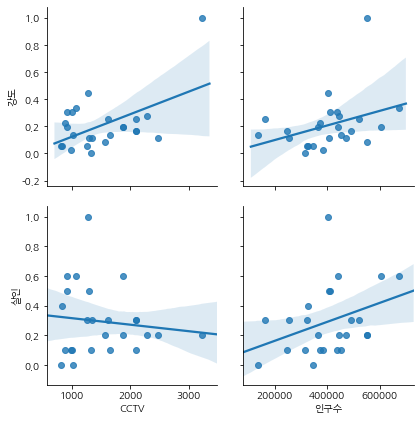

In [113]:
sns.pairplot(crime_anal_normal, x_vars=['CCTV', '인구수'],
                y_vars=['강도', '살인'],
                kind='reg', height=3)
plt.show()

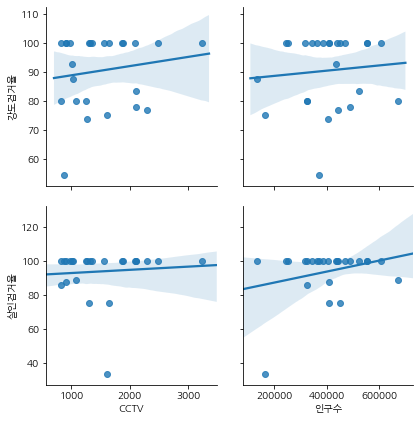

In [114]:
sns.pairplot(crime_anal_normal, x_vars=['CCTV', '인구수'],
                y_vars=['강도검거율', '살인검거율'],
                kind='reg', height=3)
plt.show()

# 100% 데이터 떄문에 관계성이 드러나지 않는다.

In [115]:
tmp_max = crime_anal_normal['검거율'].max()
crime_anal_normal['검거율'] = crime_anal_normal['검거율']/tmp_max*100

In [116]:
crime_anal_normal_sort = crime_anal_normal.sort_values('검거율', ascending=False)
crime_anal_normal_sort

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,검거율
자치구,,,,,,,,,,,,,
도봉구,0.046117,0.055556,0.0,0.000000,0.000000,90.839695,56.812933,100.000000,100.000000,98.373984,825,344096,100.000000
성동구,0.000000,0.000000,0.1,0.158030,0.069504,86.967264,69.135802,100.000000,100.000000,75.000000,1327,316068,96.654113
동대문구,0.208738,0.194444,0.2,0.394708,0.468957,89.969720,55.206186,100.000000,100.000000,83.157895,1870,364527,96.033239
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,95.984559
중랑구,0.145631,0.305556,0.5,0.303197,0.672784,85.714286,62.211709,87.500000,100.000000,91.463415,916,410296,95.709404
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,95.572437
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,94.656164
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,94.532602
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,92.724761


In [119]:
target_col = ['폭력검거율', '절도검거율', '살인검거율', '강도검거율', '강간검거율']

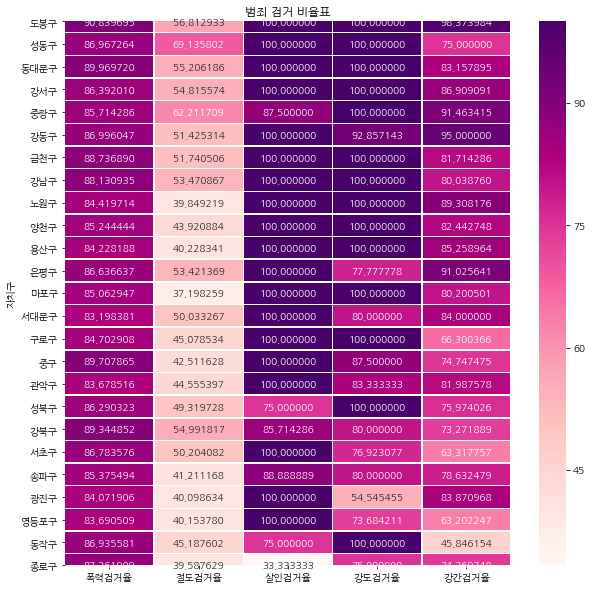

In [120]:
plt.figure( figsize=(10,10) )
sns.heatmap( crime_anal_normal_sort[ target_col ],
           annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
plt.title('범죄 검거 비율표')
plt.show()

In [124]:
col = ['폭력', '절도', '살인', '강도', '강간']

In [126]:
crime_anal_normal

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,검거율
자치구,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,94.532602
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,95.572437
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,85.941698
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,95.984559
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,88.235727
광진구,0.424757,0.222222,0.1,0.650496,0.371339,84.071906,40.098634,100.000000,54.545455,83.870968,878,370519,81.292675
구로구,0.410194,0.194444,0.6,0.383682,0.672784,84.702908,45.078534,100.000000,100.000000,66.300366,1884,440305,88.802282
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,94.656164
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,92.724761


In [128]:
crime_anal_normal['범죄'] = np.sum(crime_anal_normal[col], axis=1)

In [129]:
crime_anal_normal['범죄'] = crime_anal_normal['범죄']/5
crime_anal_normal_sort = crime_anal_normal.sort_values('범죄', ascending=False)

In [1]:
plt.figure( figsize=(10,10) )
sns.heatmap( crime_anal_normal_sort[ col ],
           annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
plt.title('범죄 검거 비율표')
plt.show()

NameError: name 'plt' is not defined

In [131]:
crime_anal_normal.to_csv('./data/crime_analysis_mid.csv', sep=',', encoding='euc-kr')

# 지도 시각화

In [141]:
crime_anal_normal = pd.read_csv('./data/crime_analysis_mid.csv', encoding='euc-kr')

In [146]:
import json
geo_json = './data/seoul_gu.json'
geo_seoul_gu = json.load( open(geo_json, encoding='utf-8') )
print(geo_seoul_gu['type'])
geo_seoul_gu['features'][0]

FeatureCollection


{'type': 'Feature',
 'id': '강동구',
 'properties': {'code': '11250',
  'name': '강동구',
  'name_eng': 'Gangdong-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.11519584981606, 37.557533180704915],
    [127.16683184366129, 37.57672487388627],
    [127.18408792330152, 37.55814280369575],
    [127.16530984307447, 37.54221851258693],
    [127.14672806823502, 37.51415680680291],
    [127.12123165719615, 37.52528270089],
    [127.1116764203608, 37.540669955324965],
    [127.11519584981606, 37.557533180704915]]]}}

In [147]:
import folium

In [149]:
crime_anal_normal.head()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구수,검거율,범죄
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,94.532602,0.840000
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,95.572437,0.258611
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,85.941698,0.276545
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,95.984559,0.459403
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,88.235727,0.446849


In [ ]:
crime_anal_normal.set_index( '자치구', inplace=True )

In [153]:
map = folium.Map( location=[37.5442692, 126.9665101], zoom_start=10 )

map.choropleth( geo_data=geo_seoul_gu,
               data=crime_anal_normal['범죄'],
               columns = [crime_anal_normal.index,
                          crime_anal_normal['범죄']],
               key_on='feature.id',
               fill_color='YlGn',
               legend_name="자치구별 범죄 발생 비율"
    )
map

/opt/conda/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [154]:
tmp_pop_crim_rate = crime_anal_normal['범죄']/crime_anal_normal['인구수'] * 1000000

map = folium.Map( location=[37.5442692, 126.9665101], zoom_start=10 )

map.choropleth( geo_data=geo_seoul_gu,
               data=tmp_pop_crim_rate,
               columns = [crime_anal_normal.index,
                          tmp_pop_crim_rate],
               key_on='feature.id',
               fill_color='PuRd',
               legend_name="인구대비 범죄율 (백만명기준)"
    )
map

## 관할서 별 검거

In [158]:
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구,lat,lng
0,강남,339,24,3,2438,2336,269,26,3,1129,2096,강남구,37.5093899463715,127.067070541137
1,강동,160,14,4,1754,2530,152,13,5,902,2201,강동구,37.5286763457485,127.126894359114


In [157]:
crime_per_police_raw['lat'] = lats
crime_per_police_raw['lng'] = lngs

In [159]:
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구,lat,lng
0,강남,339,24,3,2438,2336,269,26,3,1129,2096,강남구,37.5093899463715,127.067070541137
1,강동,160,14,4,1754,2530,152,13,5,902,2201,강동구,37.5286763457485,127.126894359114


In [161]:
# 관할서별 검거 현황
col = ['강간 검거', '강도 검거', '살인 검거', '절도 검거', '폭력 검거']
# 각 검거율의 최대값 기준 대비 검거값
tmp = crime_per_police_raw[col]/ crime_per_police_raw[col].max()
# 합산 및 추가
crime_per_police_raw['검거'] = np.sum(tmp, axis=1)
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구,lat,lng,검거
0,강남,339,24,3,2438,2336,269,26,3,1129,2096,강남구,37.5093899463715,127.067070541137,3.768434
1,강동,160,14,4,1754,2530,152,13,5,902,2201,강동구,37.5286763457485,127.126894359114,2.890511


In [163]:
map = folium.Map( location=[37.5442692, 126.9665101], zoom_start=10 )

for idx in crime_per_police_raw.index:
    folium.Marker( [float(crime_per_police_raw['lat'][idx]),
                   float(crime_per_police_raw['lng'][idx]),],
            popup='서울%s경찰서'%crime_per_police_raw['죄종'][idx]).add_to(map)
map    

In [164]:
map = folium.Map( location=[37.5442692, 126.9665101], zoom_start=10 )

for idx in crime_per_police_raw.index:
    gps = [float(crime_per_police_raw['lat'][idx]),
           float(crime_per_police_raw['lng'][idx]),]
    
    folium.Marker( gps,
            popup='서울%s경찰서'%crime_per_police_raw['죄종'][idx]).add_to(map)
    
    folium.CircleMarker( gps,
                       radius=crime_per_police_raw['검거'][idx]*10,
                       color='#547544',
                       fill_color="#333333").add_to(map)
map